In [1]:
import sys
import os
SCRIPT_DIR = os.getcwd()
PATH_CURRENT = os.path.join(SCRIPT_DIR, "../../src/")
PATH_CURRENT2 = os.path.join(SCRIPT_DIR, "../../src/cluster_mds/")
PLOT_PATH = os.path.join(SCRIPT_DIR, "../results/Simulations for article - Fuzzy simplicial sets and their application to geometric data analysis/MNIST_and_FashionMNIST/")
scriptPath = os.path.abspath(PATH_CURRENT)
scriptPath2 = os.path.abspath(PATH_CURRENT2)
sys.path.append(scriptPath)
sys.path.append(scriptPath2)
datasetPath = os.path.join(SCRIPT_DIR, "../../Dataset_files/")

In [2]:
from isumap_cluster import isumap_cluster
from clusterSeparationOptimizer import visualize_optimization, visualize_optimization_with_labels
from data_and_plots import plot_data, printtime, load_MNIST, load_FashionMNIST
from time import time
import numpy as np

In [16]:
import pickle

# Storing
def save_object(obj, filename):
    with open(filename, 'wb') as f:
        pickle.dump(obj, f)

# Loading
def load_object(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

def load_my_object(datasetName):
    loaded_object = load_object(datasetName + "_projection.pkl")
    optimizer_model = loaded_object["optimizer_model"]
    medoid_paths = loaded_object["medoid_paths"]
    title = loaded_object["title"]
    labels = loaded_object["labels"]
    reordered_labels_split_into_clusters = loaded_object["reordered_labels_split_into_clusters"]
    return optimizer_model, medoid_paths, title, labels, reordered_labels_split_into_clusters

In [ ]:
def run_isumap_cluster(k,N,distBeyondNN,normalize,tconorm,epm,distFun,datasetCreator, datasetName="",save_results=False,**datasetCreator_kwargs):
    data, labels = datasetCreator(N,**datasetCreator_kwargs)

    t0=time()
    results = isumap_cluster(data, k,
        normalize = normalize, distBeyondNN=distBeyondNN, tconorm = tconorm, epm=epm, distFun=distFun,verbose=True, also_return_optimizer_model=True, also_return_medoid_paths=True, labels=labels)
    t1 = time()
    printtime("Isumap total time",t1-t0)

    optimizer_model = results['optimizer_model']
    medoid_paths = results['medoid_paths']
    reordered_labels_split_into_clusters = results['true_labels_split_into_clusters']

    title = datasetName + " N_" + str(N) + " k_" + str(k) + " beyondNN_" + str(distBeyondNN) + " normalize_" + str(normalize) + " tconorm_" + tconorm + " distFun_" + distFun + " epm_" + str(epm)

    if save_results:
        my_object = {"optimizer_model": optimizer_model, "medoid_paths": medoid_paths, "title": title, "labels": labels, "reordered_labels_split_into_clusters": reordered_labels_split_into_clusters} 
        save_object(my_object, datasetName + '_projection.pkl')

    return optimizer_model, medoid_paths, title, labels, reordered_labels_split_into_clusters


In [5]:
def plot_isumap_cluster(optimizer_model, medoid_paths, title, plot_path=PLOT_PATH, enable_grid=False, labels=None):

    visualize_optimization(optimizer_model, title=title, medoid_paths=medoid_paths, save_path=plot_path+title + " grid_" + str(enable_grid)+".png", display=True, enable_grid=enable_grid)
    visualize_optimization_with_labels(optimizer_model, title=title, medoid_paths=medoid_paths, save_path=plot_path+title+"_with_cluster_labels grid_" + str(enable_grid)+".png", display=True, enable_grid=enable_grid)
    if labels is not None:
        visualize_optimization_with_labels(optimizer_model, title=title, medoid_paths=medoid_paths, save_path=plot_path+title+"_with_labels grid_" + str(enable_grid)+".png", display=True, enable_grid=enable_grid, labels=labels)

    # plot_data(finalInitEmbedding,labels,title=title+" init",display=True, save=True,path=plot_path)
    # plot_data(finalEmbedding,labels,title=title,display=True, save=True,path=plot_path)
    # print("\nResult saved in '../results/Simulations for article - Fuzzy simplicial sets and their application to geometric data analysis/low_dimensional_manifolds/")

    # return finalInitEmbedding, finalEmbedding, clusterLabels

In [6]:
k = 15
N = 5000

distBeyondNN = False
epm = True
normalize = True
tconorm = "canonical"
distFun = "canonical"

In [ ]:
optimizer_model, medoid_paths, title, labels, reordered_labels_split_into_clusters = run_isumap_cluster(k,N,distBeyondNN,normalize,tconorm,epm,distFun,load_MNIST,datasetName="MNIST",save_results=True,**{"datasetPath": datasetPath})


Loading 'mnist_784' data from file
Selecting subset of N =  5000
Number of CPU threads =  8

Nearest neighbours computed in: 0.67 sec

Normalization computed in: 2.58 sec
Computing the graph...

Graph computation: 0.20 sec
Applying t-conorm...

T-conorm application: 1.55 sec

Running Dijkstra...

Dijkstra: 9.89 sec

Performing classical MDS...

classical MDS: 4.18 sec

Starting cluster separation optimization...
Optimizing separation for 10 clusters...
Total parameters: 30
Iteration 0, Loss: 132.353775
Iteration 10, Loss: 4.073298
Iteration 20, Loss: 0.037071
Iteration 30, Loss: 0.006866
Iteration 40, Loss: 0.003755
Iteration 50, Loss: 0.001908
Converged at iteration 57

Isumap total time: 36.96 sec


In [17]:
optimizer_model, medoid_paths, title, labels, reordered_labels_split_into_clusters = load_my_object("MNIST")
# split_labels = np.split(reordered_labels, np.cumsum(optimizer_model.cluster_sizes)[:-1])
# reordered_labels = np.concatenate(reordered_labels_split_into_clusters)

KeyError: 'reordered_labels_split_into_clusters'

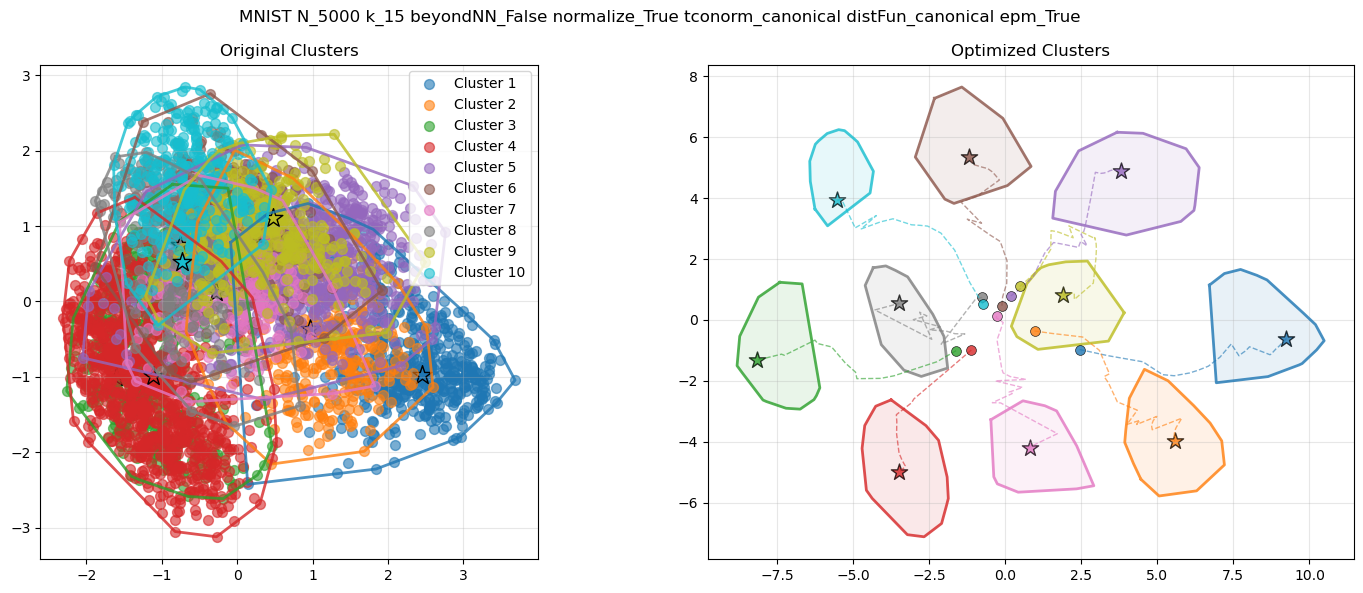

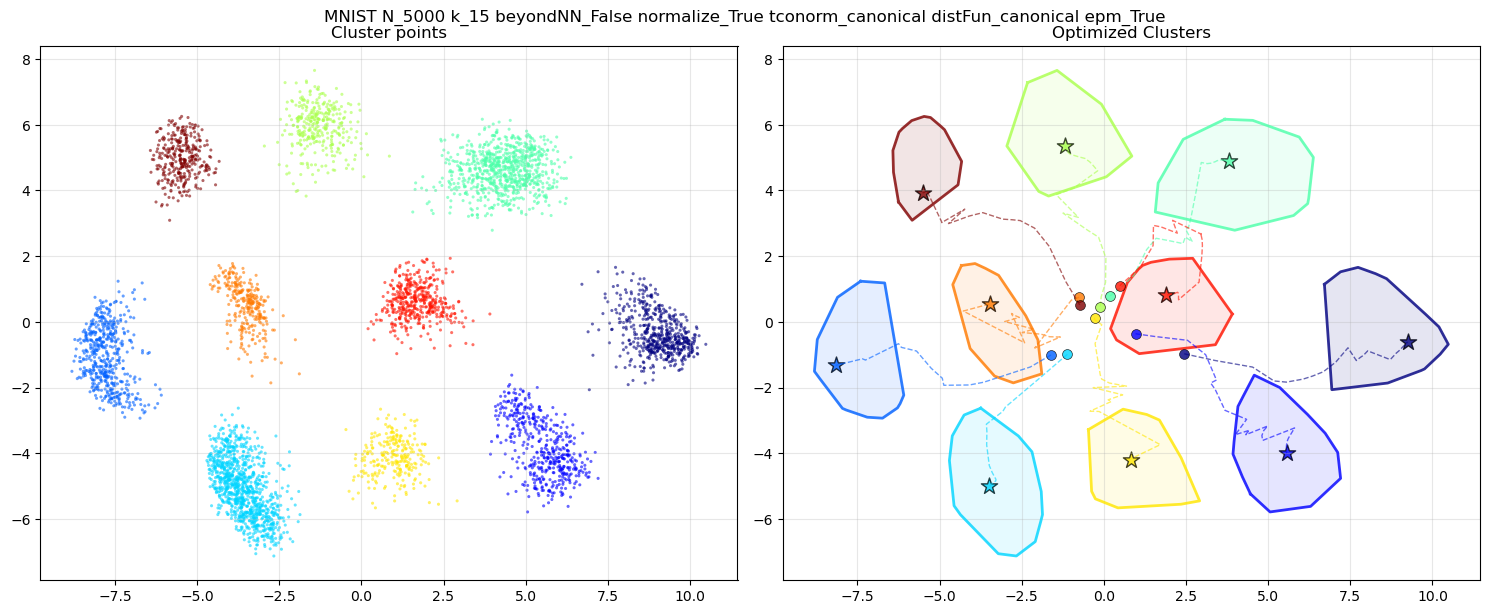

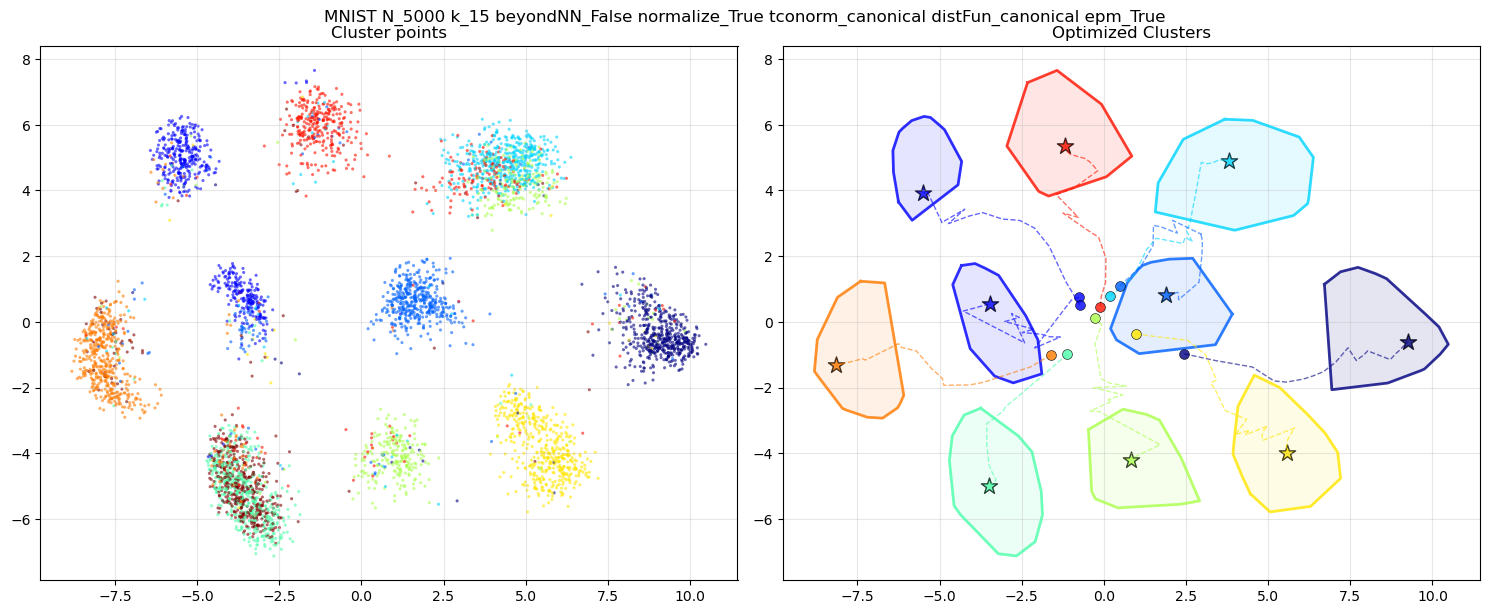

In [ ]:
plot_isumap_cluster(optimizer_model, medoid_paths, title, labels=reordered_labels_split_into_clusters, enable_grid=True)

In [ ]:
optimizer_model, medoid_paths, title, labels, reordered_labels_split_into_clusters = run_isumap_cluster(k,N,distBeyondNN,normalize,tconorm,epm,distFun,load_FashionMNIST,datasetName="FashionMNIST",save_results=True,**{"datasetPath": datasetPath})


Loading 'fashion-mnist' data from file
Selecting subset of N =  5000
Number of CPU threads =  8

Nearest neighbours computed in: 0.77 sec

Normalization computed in: 0.00 sec
Computing the graph...

Graph computation: 0.23 sec
Applying t-conorm...

T-conorm application: 1.51 sec

Running Dijkstra...


Process ForkPoolWorker-16:
Process ForkPoolWorker-14:
Process ForkPoolWorker-11:
Process ForkPoolWorker-9:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-15:
Process ForkPoolWorker-13:
Traceback (most recent call last):
  File "/home/luke/miniconda3/envs/isumap/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/luke/miniconda3/envs/isumap/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/luke/miniconda3/envs/isumap/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Process ForkPoolWorker-10:
  File "/home/luke/miniconda3/envs/isumap/lib/python3.12/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/luke/miniconda3/envs/isumap/lib/python3.12/multiprocessing/process.py", line 108, in run
    self._

KeyboardInterrupt: 

In [18]:
optimizer_model, medoid_paths, title, labels, reordered_labels_split_into_clusters = load_my_object("FashionMNIST")

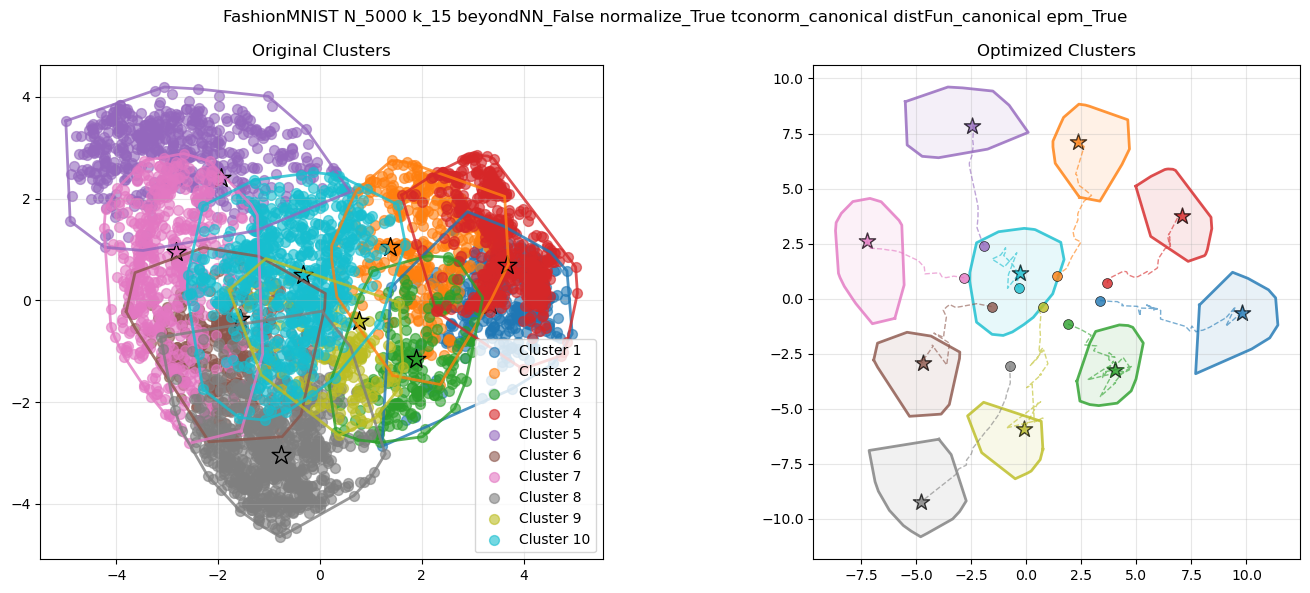

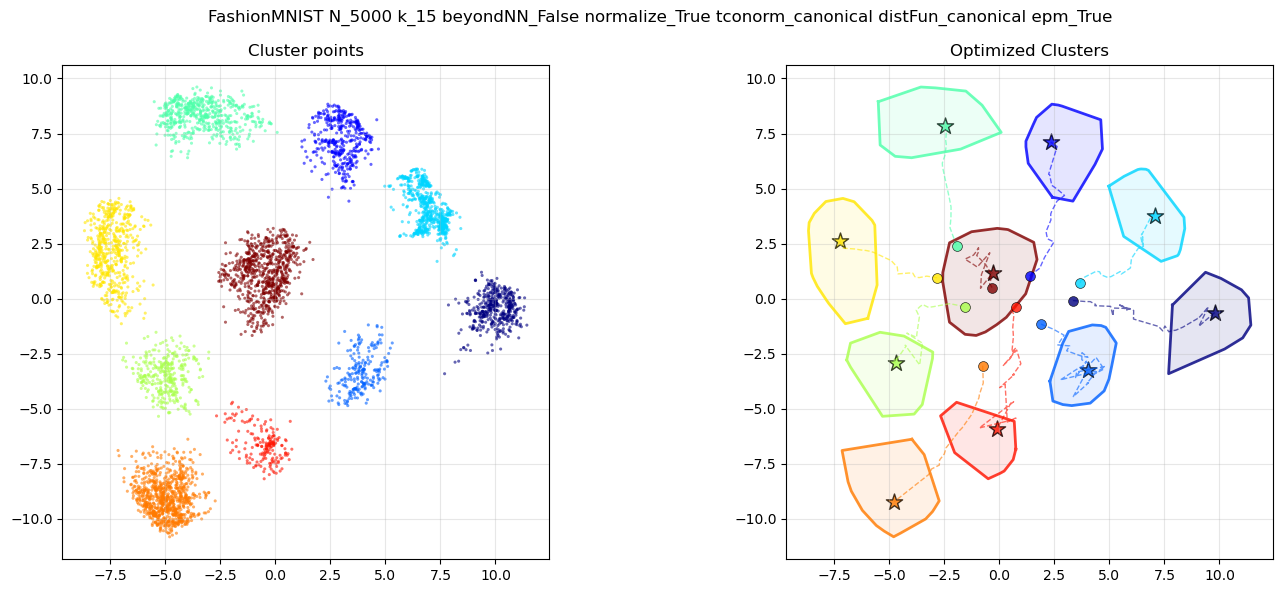

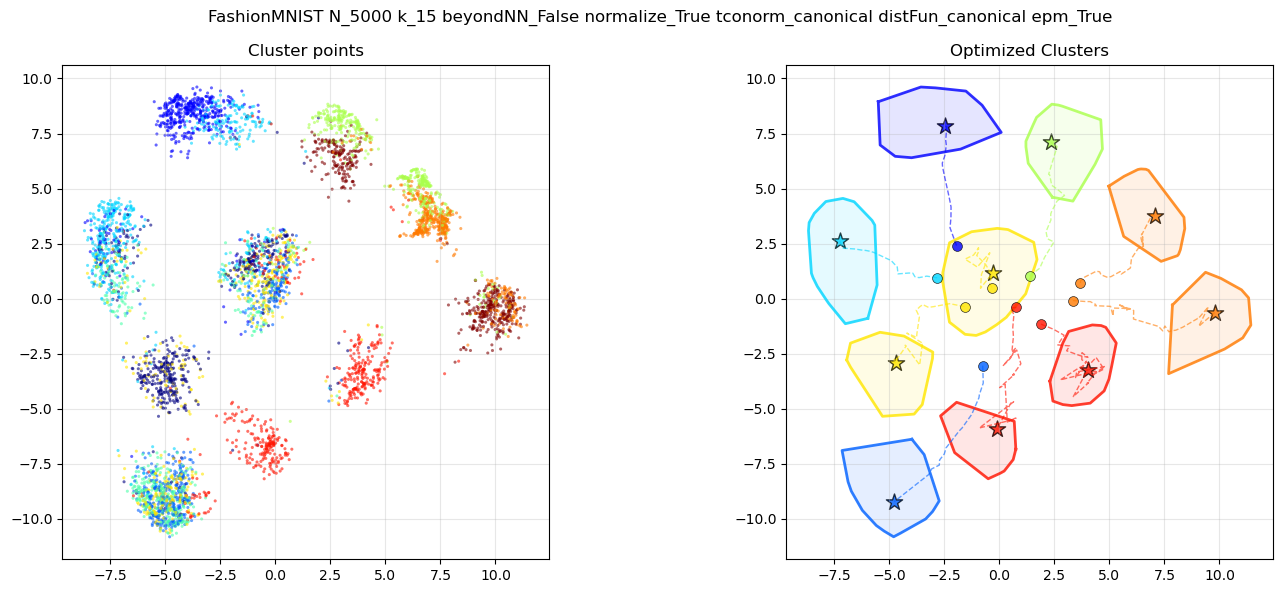

In [12]:
plot_isumap_cluster(optimizer_model, medoid_paths, title, labels=reordered_labels_split_into_clusters, enable_grid=True)